<h2>引言</h2>
在进行加密货币的量化研究过程中，我遇到了一些困难。
<ol>
<li>原来的abu系统中Huobi api已经失效，而且只能获取Bitcoin和Litecoin的数据,示范策略并没有覆盖多币种</li>
<li>很多离线数据集没有包含最新的一些数据</li>
<li>市场上很多加密货币的api都需要付费，而我目前暂时没有付费获取数据的意愿</li>
</ol>
因而，我这篇研究分享主要完成如下内容。
<ol>
<li>在Qsabu中加入获取CoinMarketCap上的多币种日线数据</li>
<li>利用获取的数据进行简单策略的分析</li>
</ol>

<h2>项目地址</h2>
https://github.com/qiushui777/Qsabu

<h2>数据获取</h2>
我新增了ScraperQs文件夹，目前主要代码在QsCoinMk.py中。这里简单介绍下，具体可以去看源码。
<ul>
<li>get_all_kline_data和refresh_all_kline_data可以获取并更新前20币种的日线数据集</li>
<li>get_all_kline_data可能会被网站暂时屏蔽，所以可以等一段时间后再去用refresh_all_kline_data继续下载</li>
<li>获取到的数据以csv的格式存放在abu\data\cache中</li>
</ul>

<h2>数据可视化分析</h2>

In [1]:
# 基础库导入

from __future__ import print_function
from __future__ import division

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy

In [3]:
from abupy import ABuMarketDrawing,ABuKLUtil
from abupy import QsDataMarket

这里我们获取5个币种的数据进行分析。因为我写的数据获取模块可以获取20个币种，经过适当的扩展可以获取更多的币种，有兴趣的朋友可以自行摸索。

In [4]:
qsmarket = QsDataMarket()
bitcoin = qsmarket.get_coin_df(coin='bitcoin')
ethereum = qsmarket.get_coin_df(coin='ethereum')
litecoin = qsmarket.get_coin_df(coin='litecoin')
ripple = qsmarket.get_coin_df(coin='ripple')
bitcoin_cash = qsmarket.get_coin_df(coin='bitcoin-cash')

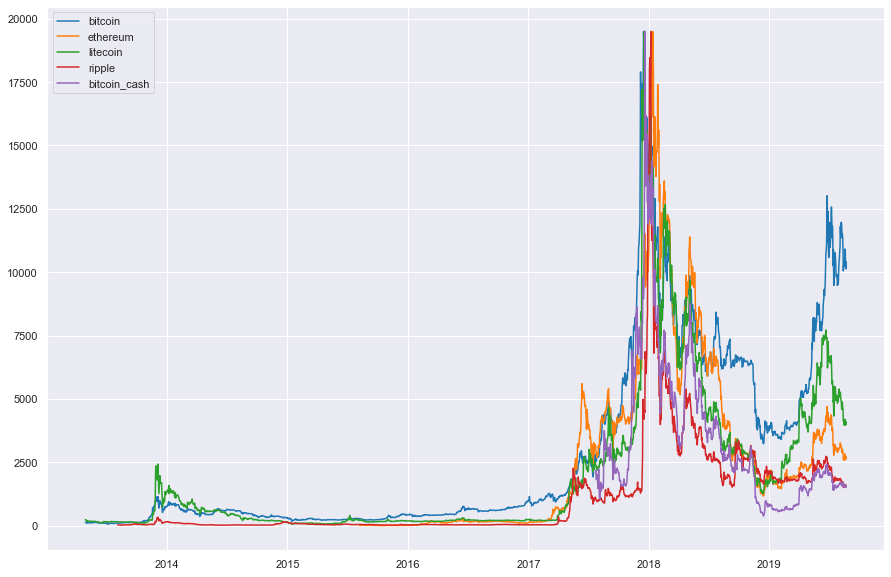

In [5]:
mpl.rcParams['figure.figsize'] = (15,10)
ABuMarketDrawing.plot_multi_df({'bitcoin':bitcoin,'ethereum':ethereum,'litecoin':litecoin,'ripple':ripple,
                                'bitcoin_cash':bitcoin_cash})

显然，最近两年的走势研究起来比较有趣，这部分波动比较大。

In [8]:
bitcoin_2y = bitcoin[-730:]
ethereum_2y = ethereum[-730:]
litecoin_2y = litecoin[-730:]
ripple_2y = ripple[-730:]
bitcoin_cash_2y = bitcoin_cash[-730:]

我们调用date_week_wave这个api来分析统计交易日震荡幅度

In [12]:
ABuKLUtil.date_week_wave({'bitcoin':bitcoin,'bitcoin_2y':bitcoin_2y,'ethereum':ethereum,'ethereum_2y':ethereum_2y,
                         'litecoin':litecoin,'litecoin_2y':litecoin_2y,'ripple':ripple,'ripple_2y':ripple_2y,
                         'bitcoin_cash':bitcoin_cash,'bitcoin_cash_2y':bitcoin_cash_2y})

,bitcoinwave,bitcoin_2ywave,ethereumwave,ethereum_2ywave,litecoinwave,litecoin_2ywave,ripplewave,ripple_2ywave,bitcoin_cashwave,bitcoin_cash_2ywave
date_week,,,,,,,,,,
周一,5.0517,5.5370,8.0199,6.9998,7.1569,7.7824,6.8892,7.3424,10.1089,8.9624
周二,4.9958,5.5683,8.8851,6.9960,7.0821,8.0443,7.6201,8.3515,10.4996,9.3171
周三,5.0914,5.7162,8.6470,7.2692,7.5012,7.9759,7.2642,8.1737,11.2436,9.9763
周四,5.4837,6.0565,8.6952,7.1270,7.3081,7.9798,8.0133,9.8603,11.1515,10.3600
周五,5.2655,5.6269,8.1243,7.0079,7.3928,8.7184,7.2115,8.8623,11.5971,10.1290
周六,4.4489,4.8150,7.3871,5.6515,6.2591,7.3049,6.0057,6.0486,9.0782,8.1605
周日,4.5508,4.9736,7.3269,6.1692,6.2982,6.9742,6.5662,6.4008,9.0241,8.8258


我们调用p_change_stats这个api获取统计周期内的上涨均值，下跌均值，以及数量，比值

In [16]:
ABuKLUtil.p_change_stats({'bitcoin':bitcoin,'bitcoin_2y':bitcoin_2y,'ethereum':ethereum,'ethereum_2y':ethereum_2y,
                         'litecoin':litecoin_2y,'ripple':ripple,'ripple_2y':ripple_2y,
                         'bitcoin_cash':bitcoin_cash,'bitcoin_cash_2y':bitcoin_cash_2y})

bitcoin日涨幅平均值0.028, 共1240个交易日上涨走势
bitcoin日跌幅平均值-0.028, 共1020个交易日下跌走势
bitcoin日平均涨跌比1.011, 上涨下跌数量比:1.216

bitcoin_2y日涨幅平均值0.030, 共397个交易日上涨走势
bitcoin_2y日跌幅平均值-0.032, 共322个交易日下跌走势
bitcoin_2y日平均涨跌比0.939, 上涨下跌数量比:1.233

ethereum日涨幅平均值0.051, 共720个交易日上涨走势
ethereum日跌幅平均值-0.039, 共740个交易日下跌走势
ethereum日平均涨跌比1.315, 上涨下跌数量比:0.973

ethereum_2y日涨幅平均值0.039, 共358个交易日上涨走势
ethereum_2y日跌幅平均值-0.037, 共361个交易日下跌走势
ethereum_2y日平均涨跌比1.052, 上涨下跌数量比:0.992

litecoin日涨幅平均值0.047, 共348个交易日上涨走势
litecoin日跌幅平均值-0.039, 共376个交易日下跌走势
litecoin日平均涨跌比1.213, 上涨下跌数量比:0.926

ripple日涨幅平均值0.052, 共1004个交易日上涨走势
ripple日跌幅平均值-0.036, 共1172个交易日下跌走势
ripple日平均涨跌比1.458, 上涨下跌数量比:0.857

ripple_2y日涨幅平均值0.049, 共333个交易日上涨走势
ripple_2y日跌幅平均值-0.037, 共385个交易日下跌走势
ripple_2y日平均涨跌比1.310, 上涨下跌数量比:0.865

bitcoin_cash日涨幅平均值0.064, 共342个交易日上涨走势
bitcoin_cash日跌幅平均值-0.048, 共408个交易日下跌走势
bitcoin_cash日平均涨跌比1.344, 上涨下跌数量比:0.838

bitcoin_cash_2y日涨幅平均值0.059, 共327个交易日上涨走势
bitcoin_cash_2y日跌幅平均值-0.046, 共392个交易日下跌走势
bitcoin_cash_2y日平均涨跌比1.296, 上涨下跌数量比:0.834

